<a href="https://colab.research.google.com/github/Swaraj-sj2000/Machine-leaning-projects/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df['Churn'].isnull().sum()

0

In [ ]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
df['MonthlyCharges']=pd.to_numeric(df.MonthlyCharges)
df['TotalCharges']=pd.to_numeric(df.TotalCharges,errors='coerce')
df.replace(' ',np.nan,inplace=True)

In [ ]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df.dropna(subset=['TotalCharges'],inplace=True)

In [ ]:
df.iloc[488]

customerID                8372-JUXUI
gender                          Male
SeniorCitizen                      0
Partner                           No
Dependents                       Yes
tenure                             1
PhoneService                     Yes
MultipleLines                    Yes
InternetService          Fiber optic
OnlineSecurity                    No
OnlineBackup                      No
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 74.35
TotalCharges                   74.35
Churn                            Yes
Name: 489, dtype: object

In [ ]:
df[df['Churn']=='No'].head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


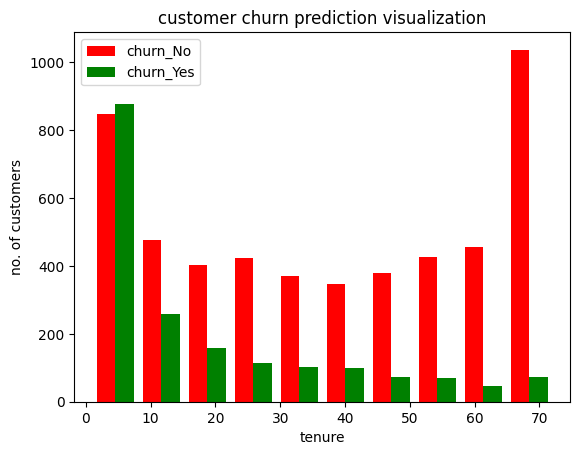

In [ ]:
tenure_churn_no=df[df.Churn=='No'].tenure
tenure_churn_yes=df[df.Churn=='Yes'].tenure
plt.xlabel("tenure")
plt.ylabel("no. of customers")
plt.title("customer churn prediction visualization")
plt.hist([tenure_churn_no,tenure_churn_yes],color=['red','green'],label=["churn_No","churn_Yes"])
plt.legend()

In [ ]:
tenure_churn_no

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

In [ ]:
def print_unique_col_values(df):
  for cols in df:
    if df[cols].dtype=='object':
      print(f"{cols}:{df[cols].unique()}")


In [ ]:
print_unique_col_values(df)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df.drop('customerID',axis=1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [ ]:
df.replace('No phone service','No',inplace=True)
df.replace('No internet service','No',inplace=True)

In [ ]:
print_unique_col_values(df)

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
yes_or_no=list(df.columns)

In [ ]:
for cols in yes_or_no:
  df[cols].replace({'Yes':1,'No':0,'Female':0,'Male':1},inplace=True)

In [ ]:
for cols in df:
  print(f"{cols}:{df[cols].unique()}")

customerID:['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender:[0 1]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 0]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [ ]:
df2=pd.get_dummies(df,columns=['InternetService','Contract','PaymentMethod'])

In [ ]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6370,2869-ADAWR,0,0,0,0,45,1,1,0,1,...,0,0,1,1,0,0,0,1,0,0
6741,2180-DXNEG,0,0,0,0,12,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
4892,8875-AKBYH,1,1,0,0,20,1,1,0,0,...,0,0,1,1,0,0,0,0,1,0
1334,1768-ZAIFU,0,1,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [ ]:
df2.dtypes


customerID                                  object
gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL            

In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df2[cols_to_scale]=scaler.fit_transform(df2[cols_to_scale])


In [ ]:
df2.sample(4)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
4626,0929-PECLO,0,1,0,0,0.873239,1,1,0,0,...,0,0,1,1,0,0,1,0,0,0
3161,1345-ZUKID,1,0,0,0,0.183099,1,0,0,0,...,1,0,0,0,1,0,0,0,0,1
3687,6849-OYAMU,1,0,1,1,0.253521,1,0,0,1,...,0,0,1,0,1,0,1,0,0,0
312,1557-EMYVT,0,0,0,0,0.591549,1,1,1,1,...,0,0,1,0,0,1,0,1,0,0


In [ ]:
X=df2.drop(['Churn','customerID'],axis=1)

Y=df2['Churn']

In [ ]:

X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.000000,0,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
1,1,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1
2,1,0,0,0,0.014085,1,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
3,1,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
4,0,0,0,0,0.014085,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)


(5625, 26) (1407, 26) (5625,) (1407,)


In [ ]:
X_train.shape[1]

26

In [ ]:
model=keras.Sequential([keras.layers.Dense(20,input_shape=(X_train.shape[1],),activation='relu'),
                        keras.layers.Dense(15,activation='relu'),
                        keras.layers.Dense(1,activation='sigmoid'),])

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,Y_train,epochs=1000)

Epoch 1/1000
176/176 [==============================] - 6s 3ms/step - loss: 0.4957 - accuracy: 0.7522
Epoch 2/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4288 - accuracy: 0.7952
Epoch 3/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4205 - accuracy: 0.8021
Epoch 4/1000
176/176 [==============================] - 1s 4ms/step - loss: 0.4188 - accuracy: 0.8037
Epoch 5/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4158 - accuracy: 0.8052
Epoch 6/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4132 - accuracy: 0.8039
Epoch 7/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8064
Epoch 8/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4116 - accuracy: 0.8055
Epoch 9/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.4108 - accuracy: 0.8082
Epoch 10/1000
176/176 [==============================] - 1s 3ms/step - loss: 0.409

In [ ]:
model.evaluate(X_train,Y_train)

176/176 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.8754


[0.277127206325531, 0.8753777742385864]

In [ ]:
model.evaluate(X_test,Y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.7845 - accuracy: 0.7477


[0.7845138907432556, 0.7476901412010193]

In [ ]:
yp=model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.00324601],
       [0.06440546],
       [0.96857107],
       [0.0019855 ],
       [0.0683008 ]], dtype=float32)

In [ ]:
Y_test[:5]

2481    0
6784    0
6125    1
3052    0
4099    0
Name: Churn, dtype: int64

In [ ]:
y_pred=[]
for elem in yp:
  if elem>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [ ]:
y_pred[:10]

<class 'pandas.core.series.Series'>


In [ ]:
y_pred=[]
for elem in yp:
  if elem>0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

0.7476901208244492


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1033
           1       0.53      0.46      0.49       374

    accuracy                           0.75      1407
   macro avg       0.67      0.66      0.66      1407
weighted avg       0.74      0.75      0.74      1407



Text(95.72222222222221, 0.5, 'Truth')

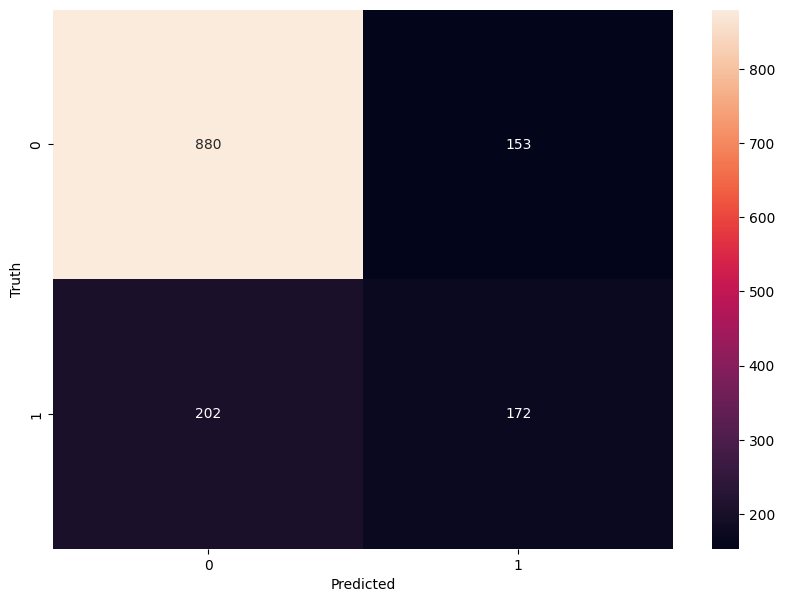

In [ ]:
cm=tf.math.confusion_matrix(labels=Y_test,predictions=y_pred)
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')